# MOVIE INDUSTRY ANALYSIS: 
## Analyzing Box Office Trends to Inform Film Production Decisions

## Business Understanding

The primary objective of this project is to explore and analyze the current box office trends to identify the types of films that are currently achieving the most success. This analysis will be translated into actionable insights that will guide the strategic decisions of our new movie studio.¶

##### Specifically, we aim to:
Identify the genres and themes that are currently popular.

Understand the financial dynamics of film production, including budget-to-revenue relationships.

Determine the optimal timing for film releases.

 Analyze audience demographics and preferences.
 
 By understanding the key factors that contribute to a film's success, we can make informed decisions about the genres, themes, and target audiences that will maximize our chances of producing commercially successful films.

## Data Understanding 

The data for this analysis is sourced from three online movie databases:

##### Box Office Mojo
Provides detailed box office revenue data for films.

##### Internet Movie Database (IMDb)
IMDb is a comprehensive online database offering movie information, statistics, and user ratings. The dataset comprises multiple tables, and for this analysis, two tables were used: one with basic movie data and another with user ratings. The key data points include the release date, runtime (in minutes), and average rating. Contains information on genres, cast, crew, ratings, and review

##### The Movie Database (TMDB)
TMDB is a user-generated database containing detailed information about movies and user ratings. The dataset includes 26,517 entries and 9 data columns. The key data points are the release date and genre, with genre codes sorted by relevance.

##### The Numbers (TN)
The TN dataset provides box office information for 5,782 movies. The key data points include the release date, production budget, and worldwide gross revenue.



## IMPORTS AND DATA

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


## A.LOADING THE DATASETS

### 1.Loading the Dataset IMDB

IMDB dataset is comprised of multiple tables containing various information about movies. The two tables of interest are: movie_basics and movie_ratings.

The movie_basics table includes movie titles, release year, and genres. The movie_ratings table includes average movie rating and number of votes.

The primary key for both tables is movie_id.

Target data include runtime minutes, genres and average rating.

In [205]:
import sqlite3

conn = sqlite3.connect("data/im.db")

In [208]:
df_imdb= pd.read_sql(
    """
    SELECT *
    FROM sqlite_master;
    """
, conn
)

df_imdb[df_imdb['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


#### Summary statistics of imdb

In [214]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      8 non-null      object
 1   name      8 non-null      object
 2   tbl_name  8 non-null      object
 3   rootpage  8 non-null      int64 
 4   sql       8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


### Viewing Tables of interest

##### 1. Movie Basics

In [18]:
movie_basics = """

SELECT *
FROM movie_basics
;
"""

df_basics = pd.read_sql(movie_basics, conn)
df_basics.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Summary statistics of table_movie Basics

In [20]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


##### 2. Movie ratings

In [22]:
movie_ratings = """

SELECT *
FROM movie_ratings
;
"""

df_ratings = pd.read_sql(movie_ratings, conn)
df_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### Summary statistics of movie ratings

In [24]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### 2. Loading Dataset Box office Mojo

In [27]:
df_bom= pd.read_csv("data/bom.movie_gross.csv")
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Summary statistics of the dataset

In [29]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### 3. Loading the dataset The MovieDB (TMDB)

In [31]:
df_tmdb = pd.read_csv("data/tmdb.movies.csv")
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [32]:
#### Summary statistics
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### 4. Loading the dataset 'The Numbers' (TN)

In [34]:
df_tn = pd.read_csv("data/tn.movie_budgets.csv")
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [35]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## B.Data Preparation

#### a.Checking for missing values in each Datasets

In [38]:
missing_values_bom = df_bom.isnull().sum()
missing_values_tmdb = df_tmdb.isnull().sum()
missing_values_tn = df_tn.isnull().sum()

print("Missing values in df_bom:")
print(missing_values_bom)

print("\nMissing values in df_tmdb:")
print(missing_values_tmdb)

print("\nMissing values in df_tn:")
print(missing_values_tn)

Missing values in df_bom:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Missing values in df_tmdb:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Missing values in df_tn:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


#### Checking for missing values Across Rows

In [40]:
# Check for rows with missing values in df_bom
rows_with_missing_values_bom = df_bom[df_bom.isnull().any(axis=1)]

# Check for rows with missing values in df_tmdb
rows_with_missing_values_tmdb = df_tmdb[df_tmdb.isnull().any(axis=1)].sum()

# Check for rows with missing values in df_tn
rows_with_missing_values_tn = df_tn[df_tn.isnull().any(axis=1)].sum()

# Print the results
print("Rows with missing values in df_bom:")
print(rows_with_missing_values_bom)

print("\nRows with missing values in df_tmdb:")
print(rows_with_missing_values_tmdb)

print("\nRows with missing values in df_tn:")
print(rows_with_missing_values_tn)

Rows with missing values in df_bom:
                                       title      studio  domestic_gross  \
210            Outside the Law (Hors-la-loi)         NaN         96900.0   
222                                  Flipped          WB       1800000.0   
230               It's a Wonderful Afterlife         UTV             NaN   
254   The Polar Express (IMAX re-issue 2010)          WB        673000.0   
267                           Tiny Furniture         IFC        392000.0   
...                                      ...         ...             ...   
3382                               The Quake       Magn.          6200.0   
3383             Edward II (2018 re-release)          FM          4800.0   
3384                                El Pacto        Sony          2500.0   
3385                                The Swan  Synergetic          2400.0   
3386                       An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
210        3300000  2010

#### checking for missing values in dataset IMDB, table (movie basics)

In [42]:
missing_values_basics =  """
SELECT 
    COUNT(*) AS total_rows,
    SUM(CASE WHEN movie_id IS NULL THEN 1 ELSE 0 END) AS missing_id,
    SUM(CASE WHEN primary_title IS NULL THEN 1 ELSE 0 END) AS missing_primary_title,
    SUM(CASE WHEN original_title IS NULL THEN 1 ELSE 0 END) AS missing_original_title,
    SUM(CASE WHEN start_year IS NULL THEN 1 ELSE 0 END) AS missing_start_year,
    SUM(CASE WHEN runtime_minutes IS NULL THEN 1 ELSE 0 END) AS missing_runtime_minutes,
    SUM(CASE WHEN genres  IS NULL THEN 1 ELSE 0 END) AS missing_genres
FROM movie_basics
;
"""

pd.read_sql(missing_values_basics, conn)

,total_rows,missing_id,missing_primary_title,missing_original_title,missing_start_year,missing_runtime_minutes,missing_genres
0,146144,0,0,21,0,31739,5408


### Checking for missing values in IMDB IN table 'Movie _ratings"

In [44]:
missing_values_ratings =  """
SELECT 
    COUNT(*) AS total_rows,
    SUM(CASE WHEN movie_id IS NULL THEN 1 ELSE 0 END) AS missing_id,
    SUM(CASE WHEN averagerating IS NULL THEN 1 ELSE 0 END) AS missing_averagerating,
    SUM(CASE WHEN numvotes IS NULL THEN 1 ELSE 0 END) AS mising_numvotes
FROM movie_ratings
;
"""

pd.read_sql(missing_values_ratings, conn)

,total_rows,missing_id,missing_averagerating,mising_numvotes
0,73856,0,0,0


### Calculating the percentage of Missing Values

#### Calculating the percentage of missing values in the dataset 'The Box Office Mojo'

In [47]:
missing_percentage_bom = (missing_values_bom / len(df_bom)) * 100
missing_percentage_bom

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

#### Calculating the percentage of missing values in dataset IMDB, table 'Movie Basics'

In [49]:
percentage_missing_values = """
SELECT 
    COUNT(*) AS total_rows,
    (CAST(SUM(CASE WHEN movie_id IS NULL THEN 1 ELSE 0 END) AS FLOAT)/ COUNT(*)) * 100 AS miss_id_percentage,
    
    (SUM(CASE WHEN primary_title IS NULL THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS miss_title_percentage,

    (CAST(SUM(CASE WHEN original_title IS NULL THEN 1 ELSE 0 END)AS FLOAT) / COUNT(*)) * 100 AS miss_origin_percentage,
    
    (SUM(CASE WHEN start_year IS NULL THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS miss_start_year_percentage,
    
    (CAST(SUM(CASE WHEN runtime_minutes IS NULL THEN 1 ELSE 0 END) AS FLOAT) / COUNT(*)) * 100 AS miss_runtime_minutes_percentage,
    
    (CAST(SUM(CASE WHEN genres IS NULL THEN 1 ELSE 0 END)AS FLOAT) / COUNT(*)) * 100 AS miss_genres_percentage
FROM movie_basics
;
"""
pd.read_sql(percentage_missing_values, conn)

,total_rows,miss_id_percentage,miss_title_percentage,miss_origin_percentage,miss_start_year_percentage,miss_runtime_minutes_percentage,miss_genres_percentage
0,146144,0.0,0,0.014369,0,21.717621,3.70046


#### Comment
From the above observation , all other datasets do not contain missing values except for
Box Office Mojo where the columns domestic_ross  and studio having less than 1% missing values and Foreign_ross leading with 39%  missing values.
The dataset IMDB table 'movie_basics' have missing values in the following columns 'original_title', 
'runtime_minutes', 'genres' which a percentage of (0.014369, 21.717621, 3.70046) respectively.

### Dropping Rows with Missing values

Since the missing values in the dataset(The Box Office Mojo) are minimal. It would be necessary to remove the missing values since
it will NOT significantly impact the dataset perfomance, integrity and analysis.

In [53]:
#dropping rows with missing values
df_bom_cleaned = df_bom.dropna()

## Display the cleaned dataset
#print(df_bom_cleaned)

# checking for the rows with missing values in the cleaned dataset.
#cleaned_rows_with_missing_values_bom = df_bom_cleaned[df_bom_cleaned.isnull().any(axis=1)]
#cleaned_rows_with_missing_values_bom

df_bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


#### Comment

since the rows with missing values have been dropped, the number of rows reduces from 3387 rows to 2007 rows

#### Dropping rows with missing values in the  sql dataset 'IMDB'in the table 'Movie basics'

#delete_miss_movie_basics = """
DELETE FROM movie_basics
WHERE movie_id IS NULL
   OR primary_title IS NULL
   OR original_title IS NULL
   OR start_year IS NULL
   OR runtime_minutes IS NULL
   OR genres IS NULL;
"""
## conn.execute(delete_miss_movie_basics)
## pd.read_sql(delete_miss_movie_basics, conn)

In [57]:
#checking if the missing values have been deleted.
#pd.read_sql(missing_values_basics, conn)

#### Dropping unnecessary columns in the dataset

### b.Checking for duplicates in the datasets

#### Checking for duplicates in the dataset sql(IMDB), table 'Movie basics'



In [61]:
duplicates_movie_basics = """
SELECT 
    movie_id,
    primary_title,
    original_title,
    start_year,
    runtime_minutes,
    genres, 
    COUNT(*) AS count
FROM 
    movie_basics
GROUP BY 
    movie_id,
    primary_title,
    original_title,
    start_year,
    runtime_minutes,
    genres
HAVING 
    COUNT(*) > 1;
"""

df_duplicates_movie_basics = pd.read_sql(duplicates_movie_basics, conn)
df_duplicates_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,count


In [62]:
duplicates_movie_ratings = """
SELECT 
    movie_id,
    averagerating,
    numvotes,
    COUNT(*) AS count
FROM 
    movie_ratings
GROUP BY 
     movie_id,
    averagerating,
    numvotes
HAVING 
    COUNT(*) > 1;
"""

df_duplicates_movie_ratings = pd.read_sql(duplicates_movie_basics, conn)
df_duplicates_movie_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,count


#### Checking for duplicates in the dataset the Box office Mojo

In [64]:
duplicate_bom = df_bom[df_bom.duplicated(keep=False)].sum()
duplicate_bom

title               0
studio              0
domestic_gross    0.0
foreign_gross       0
year                0
dtype: object

#### Checking for duplicates in the dataset 'The MovieDB (TMDB)'

In [66]:
duplicates_tmdb = df_tmdb[df_tmdb.duplicated(keep=False)].sum()
duplicates_tmdb

Unnamed: 0             0
genre_ids              0
id                     0
original_language      0
original_title         0
popularity           0.0
release_date           0
title                  0
vote_average         0.0
vote_count             0
dtype: object

#### Checking for duplicates in the dataset 'The Numbers' (TN)

In [68]:
duplicates_tn = df_tn[df_tn.duplicated(keep=False)].sum()
duplicates_tn


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: object

#### Comment
There are no duplicates in all of the  four datasets 

## EXPLORATORY DATA ANALYSIS (EDA)

### Merging the datasets BOxMojo and TN

In [72]:
import re
# Clean and standardize movie titles
def clean_title(title):
    title = re.sub(r'[^\w\s]', '', title)
    title = title.lower().strip()
    title = re.sub(r'\s+', ' ', title)
    return title

df_bom['title'] = df_bom['title'].apply(clean_title)
df_tn['movie'] = df_tn['movie'].apply(clean_title)

# Convert numeric fields to proper format
df_bom['domestic_gross'] = df_bom['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_bom['foreign_gross'] = df_bom['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)
df_tn['production_budget'] = df_tn['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_tn['domestic_gross'] = df_tn['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Merge datasets on titles
df_merged_bomtn = pd.merge(df_bom, df_tn, left_on='title', right_on='movie', how='inner')
df_merged_bomtn.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,toy story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",toy story 3,200000000.0,415004880.0,1.068880e+09
1,inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",inception,160000000.0,292576195.0,8.355246e+08
2,shrek forever after,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",shrek forever after,165000000.0,238736787.0,7.562447e+08
3,the twilight saga eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",the twilight saga eclipse,68000000.0,300531751.0,7.061028e+08
4,iron man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",iron man 2,170000000.0,312433331.0,6.211564e+08


#### Dropping unnecessary columns

In [74]:
columns_to_drop = ['domestic_gross_x', 'foreign_gross', 'domestic_gross_y']

df_cleaned_bmtn = df_merged_bomtn.drop(columns=columns_to_drop)
df_cleaned_bmtn

,title,studio,year,id,release_date,movie,production_budget,worldwide_gross
0,toy story 3,BV,2010,47,"Jun 18, 2010",toy story 3,200000000.0,1.068880e+09
1,inception,WB,2010,38,"Jul 16, 2010",inception,160000000.0,8.355246e+08
2,shrek forever after,P/DW,2010,27,"May 21, 2010",shrek forever after,165000000.0,7.562447e+08
3,the twilight saga eclipse,Sum.,2010,53,"Jun 30, 2010",the twilight saga eclipse,68000000.0,7.061028e+08
4,iron man 2,Par.,2010,15,"May 7, 2010",iron man 2,170000000.0,6.211564e+08
...,...,...,...,...,...,...,...,...
1302,ben is back,RAtt.,2018,95,"Dec 7, 2018",ben is back,13000000.0,9.633111e+06
1303,bilal a new breed of hero,VE,2018,100,"Feb 2, 2018",bilal a new breed of hero,30000000.0,6.485990e+05
1304,mandy,RLJ,2018,71,"Sep 14, 2018",mandy,6000000.0,1.427656e+06
1305,lean on pete,A24,2018,13,"Apr 6, 2018",lean on pete,8000000.0,2.455027e+06


##### Checking for with missing values

In [76]:
# Checking for rows with missing values 
missing_values_bmtn = df_cleaned_bmtn.isnull().sum()
missing_values_bmtn

title                0
studio               1
year                 0
id                   0
release_date         0
movie                0
production_budget    0
worldwide_gross      0
dtype: int64

##### Dropping Rows with Missing values

In [78]:
df_bomtn_cleaned = df_cleaned_bmtn.dropna()

df_bomtn_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 1306
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1306 non-null   object 
 1   studio             1306 non-null   object 
 2   year               1306 non-null   int64  
 3   id                 1306 non-null   int64  
 4   release_date       1306 non-null   object 
 5   movie              1306 non-null   object 
 6   production_budget  1306 non-null   float64
 7   worldwide_gross    1306 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 91.8+ KB


#### Analyzing how different studios are performing financially

In [80]:
# Aggregate the data by studio
studio_performance = df_bomtn_cleaned.groupby('studio')['worldwide_gross'].agg(['sum', 'mean', 'count']).reset_index()
studio_performance.columns = ['studio', 'total_worldwide_gross', 'average_worldwide_gross', 'number_of_movies']

# Sort the studios by total worldwide gross in descending order
studio_performance = studio_performance.sort_values(by='total_worldwide_gross', ascending=False)

top_10_studios = studio_performance.head(10)

print(top_10_studios)

     studio  total_worldwide_gross  average_worldwide_gross  number_of_movies
15       BV           3.587512e+10             4.599375e+08                78
91     Uni.           2.800495e+10             2.276825e+08               123
32      Fox           2.760528e+10             2.400459e+08               115
95       WB           2.441023e+10             2.219112e+08               110
83     Sony           1.767599e+10             2.325789e+08                76
69     Par.           1.464334e+10             1.901733e+08                77
96  WB (NL)           8.791297e+09             2.254179e+08                39
48      LGF           7.081172e+09             1.106433e+08                64
64     P/DW           5.078028e+09             5.078028e+08                10
47     LG/S           4.787157e+09             1.450654e+08                33


####  Visualizing the data

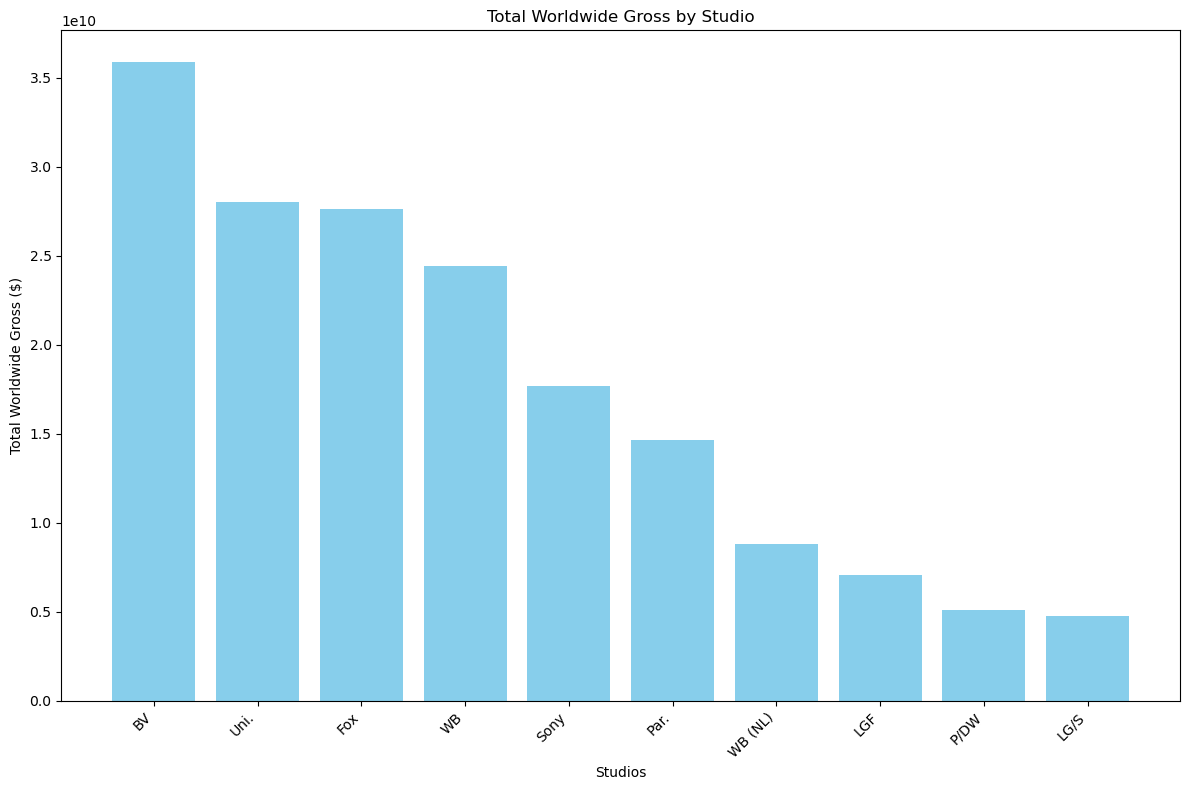

In [82]:
# Plot the total worldwide gross for each studio
plt.figure(figsize=(12, 8))
plt.bar(top_10_studios['studio'], top_10_studios['total_worldwide_gross'], color='skyblue')
plt.xlabel('Studios')
plt.ylabel('Total Worldwide Gross ($)')
plt.title('Total Worldwide Gross by Studio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Comment

From the Observation the Studio (BV) has the highest worldwide Gross Revenue, followed by Uni, Fox and Sony.

####  Top 10 Highest-Grossing Movies Worldwide by Studio


In [86]:
top_10_worldwide = df_bomtn_cleaned.nlargest(10, 'worldwide_gross')
print(top_10_worldwide[['title', 'studio', 'worldwide_gross']])

                              title studio  worldwide_gross
1209          avengers infinity war     BV     2.048134e+09
805                  jurassic world   Uni.     1.648855e+09
806                       furious 7   Uni.     1.518723e+09
807          avengers age of ultron     BV     1.403014e+09
1210                  black panther     BV     1.348258e+09
1211  jurassic world fallen kingdom   Uni.     1.305773e+09
522                          frozen     BV     1.272470e+09
1212                  incredibles 2     BV     1.242521e+09
1098        the fate of the furious   Uni.     1.234846e+09
523                      iron man 3     BV     1.215392e+09


#### Dropping movies with zero values for Worldwide Gross

In [88]:
top_10_worldwide_0 = top_10_worldwide[top_10_worldwide['worldwide_gross'] != 0]
top_10_worldwide_0.head(3)

,title,studio,year,id,release_date,movie,production_budget,worldwide_gross
1209,avengers infinity war,BV,2018,7,"Apr 27, 2018",avengers infinity war,300000000.0,2.048134e+09
805,jurassic world,Uni.,2015,34,"Jun 12, 2015",jurassic world,215000000.0,1.648855e+09
806,furious 7,Uni.,2015,67,"Apr 3, 2015",furious 7,190000000.0,1.518723e+09


##### Plotting a grapgh of Top 10 Highest-Grossing Movies Worldwide by Studio

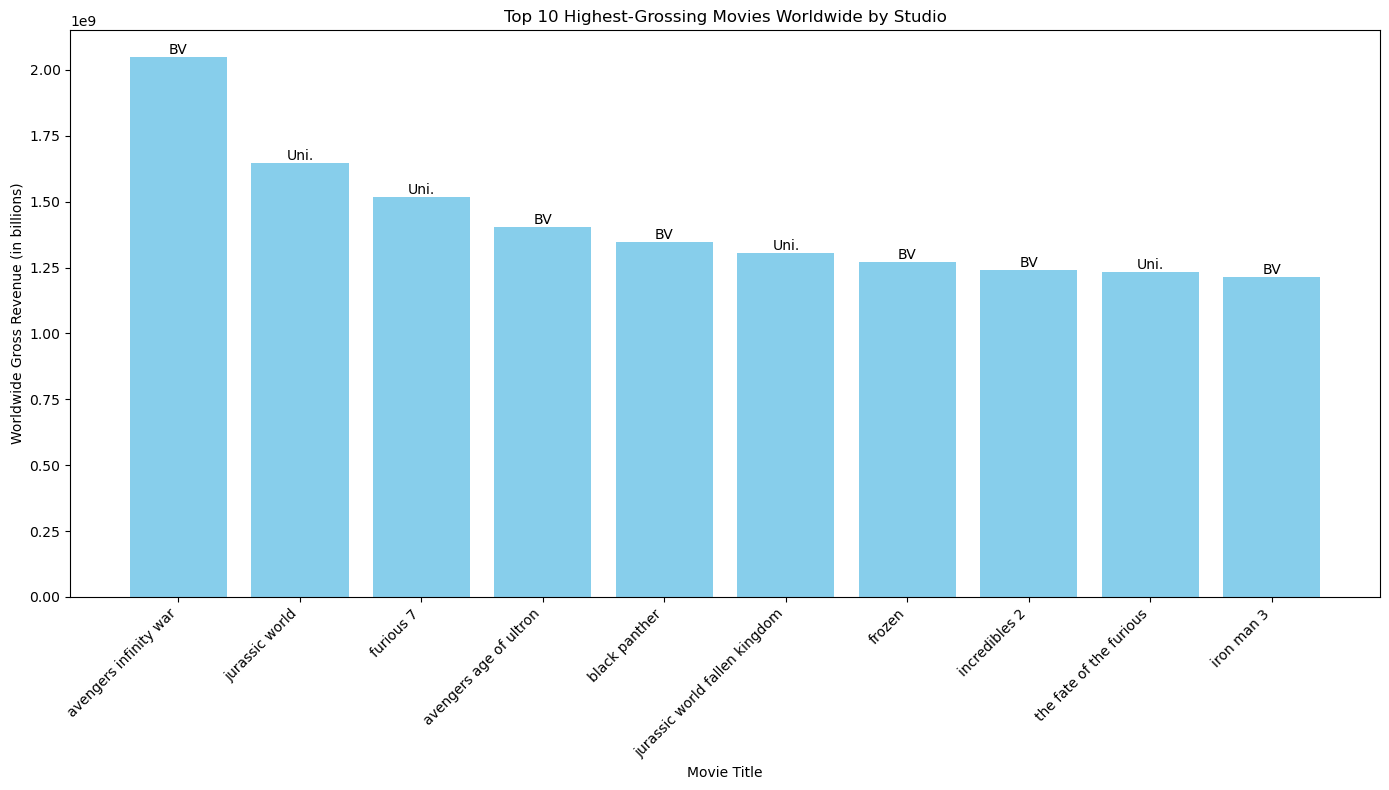

In [90]:
# Extract relevant columns for the chart
top_10_data = top_10_worldwide_0[['title', 'studio', 'worldwide_gross']]

# Create the bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(top_10_data['title'], top_10_data['worldwide_gross'], color='skyblue')

# Add labels for the studios
for bar, studio in zip(bars, top_10_data['studio']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, studio, ha='center', va='bottom', fontsize=10)

plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross Revenue (in billions)')
plt.title('Top 10 Highest-Grossing Movies Worldwide by Studio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Comment

From the observation above , The Movie Titles with the Highest Worldwide Gross are 'Avengers infinity war' from BV studio, 
'jurassic world' from Uni studio, 'furious' from Uni studio and 'avengers agge of ultron' from Bv studio. 

These clearly indicates that the two studios are doing well generally interm of movies production

#####  Calculating Return on Investment (ROI) for Each Movie

In [94]:
top_10_worldwide_0['ROI'] = (top_10_worldwide_0['worldwide_gross'] - top_10_worldwide_0['production_budget']) / top_10_worldwide_0['production_budget']
top_10_roi = top_10_worldwide_0.nlargest(10, 'ROI').head()

top_10_roi[['title', 'studio', 'production_budget', 'worldwide_gross', 'ROI']]

,title,studio,production_budget,worldwide_gross,ROI
522,frozen,BV,150000000.0,1.272470e+09,7.483133
806,furious 7,Uni.,190000000.0,1.518723e+09,6.993278
1211,jurassic world fallen kingdom,Uni.,170000000.0,1.305773e+09,6.681016
805,jurassic world,Uni.,215000000.0,1.648855e+09,6.669092
1209,avengers infinity war,BV,300000000.0,2.048134e+09,5.827114


#### A plot to Calculate Return on Investment (ROI) for Each Movie

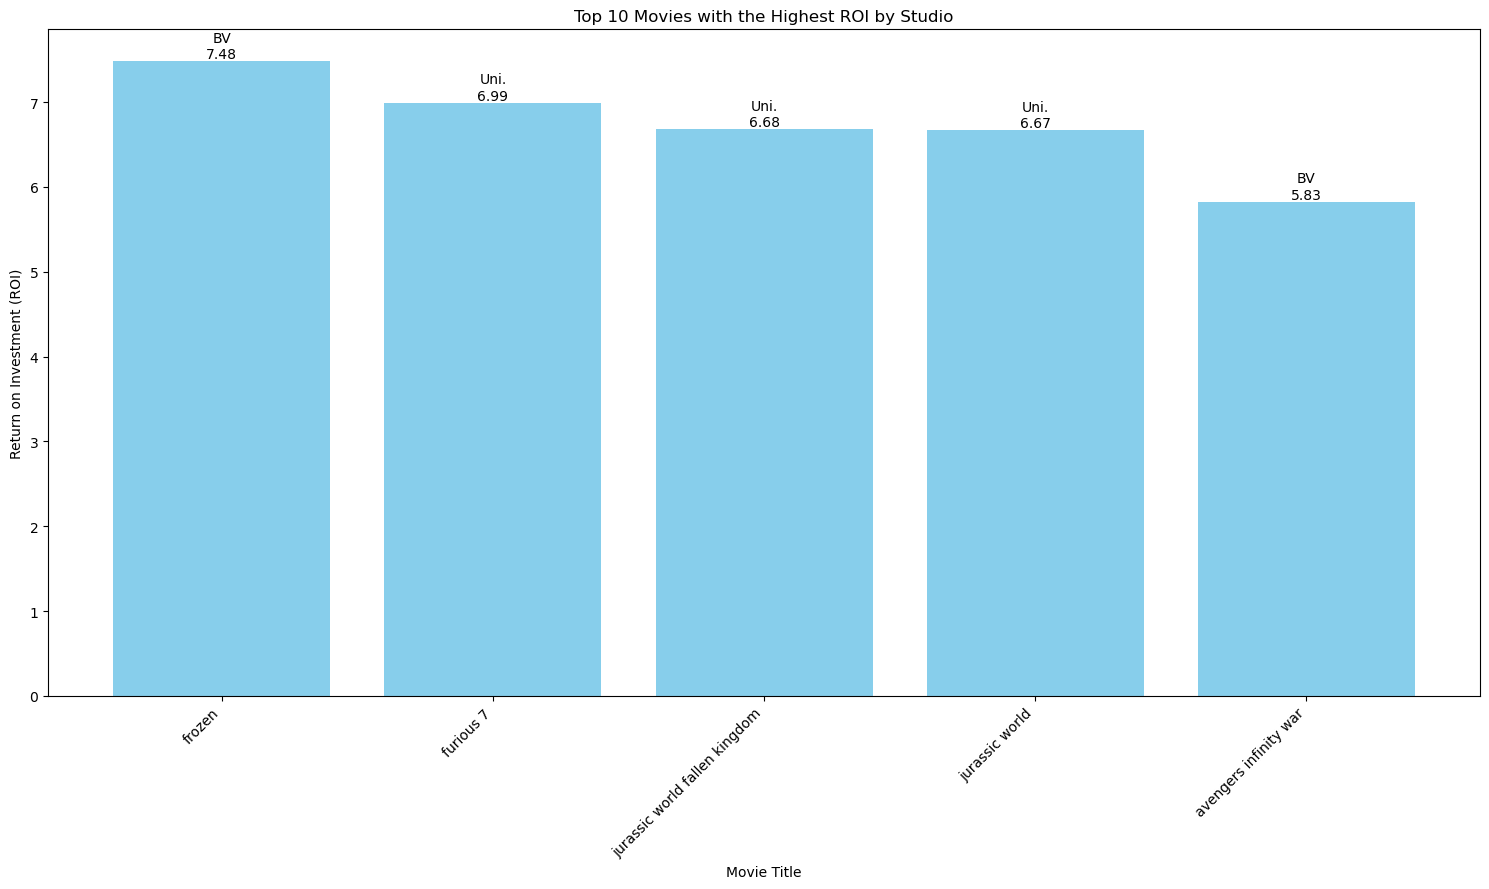

In [236]:
# Extract relevant columns for the chart
top_10_roi_data = top_10_roi[['title', 'studio', 'production_budget', 'worldwide_gross', 'ROI']]

# Create the bar chart
plt.figure(figsize=(15, 9))
bars = plt.bar(top_10_roi_data['title'], top_10_roi_data['ROI'], color='skyblue')

# Add labels for the studios and ROI values
for bar, roi, studio in zip(bars, top_10_roi_data['ROI'], top_10_roi_data['studio']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{studio}\n{roi:.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Movie Title')
plt.ylabel('Return on Investment (ROI)')
plt.title('Top 10 Movies with the Highest ROI by Studio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Comment

###### . The movie 'frozen' of studio 'BV', generated significant profits with an ROI of 7.48, indicating that for every dollar spent on
###### production, the movie earned $7.48 in gross revenue.

###### . The movie 'furious 7' of studio 'Uni' was highly profitable with an ROI of 6.99, showing that for every dollar spent, the movie 
###### earned $6.99 in gross revenue.

###### .The movie 'Jurassic World fallen kingdom' of studio 'Universal'also performed well with an ROI of 6.68, indicating substantial
###### profitability. Although it was the second highest grossing movie worldwide.

###### ."Avengers: Infinity War" of studio 'BV' had the highest worldwide gross among the listed movies but a lower ROI of 5.83, showing that despite its
###### massive earnings, its high production cost reduced its ROI compared to others on the list. Same case with 'Avengers age of ultron'

####  Domestic vs. Foreign Gross Comparison

In [103]:
## Fill missing values in 'foreign_gross' with the mean value of the column
mean_foreign_gross = df_merged_bomtn['foreign_gross'].mean()
df_merged_bomtn['foreign_gross'].fillna(mean_foreign_gross, inplace=True)

## Calculate domestic and foreign percentages of the worldwide gross
df_merged_bomtn['domestic_percentage'] = df_merged_bomtn['domestic_gross_x'] / df_merged_bomtn['worldwide_gross']
df_merged_bomtn['foreign_percentage'] = df_merged_bomtn['foreign_gross'] / df_merged_bomtn['worldwide_gross']
df_merged_bomtn[['title', 'domestic_percentage', 'foreign_percentage']].head(10)

sorted_by_domestic = df_merged_bomtn.sort_values(by='domestic_percentage', ascending=False)
sorted_by_domestic[['title', 'domestic_percentage', 'foreign_percentage']].head(10)

,title,domestic_percentage,foreign_percentage
947,eden,inf,inf
325,point blank,inf,inf
630,trance,inf,inf
614,snitch,inf,inf
754,the gambler,331.129081,55.024417
246,unknown,18.986316,19.999714
1204,the square,8.510059,572.581961
1208,the journey,7.828283,5097.194024
655,believe,6.963921,113.359656
484,playing for keeps,6.550000,50.462221


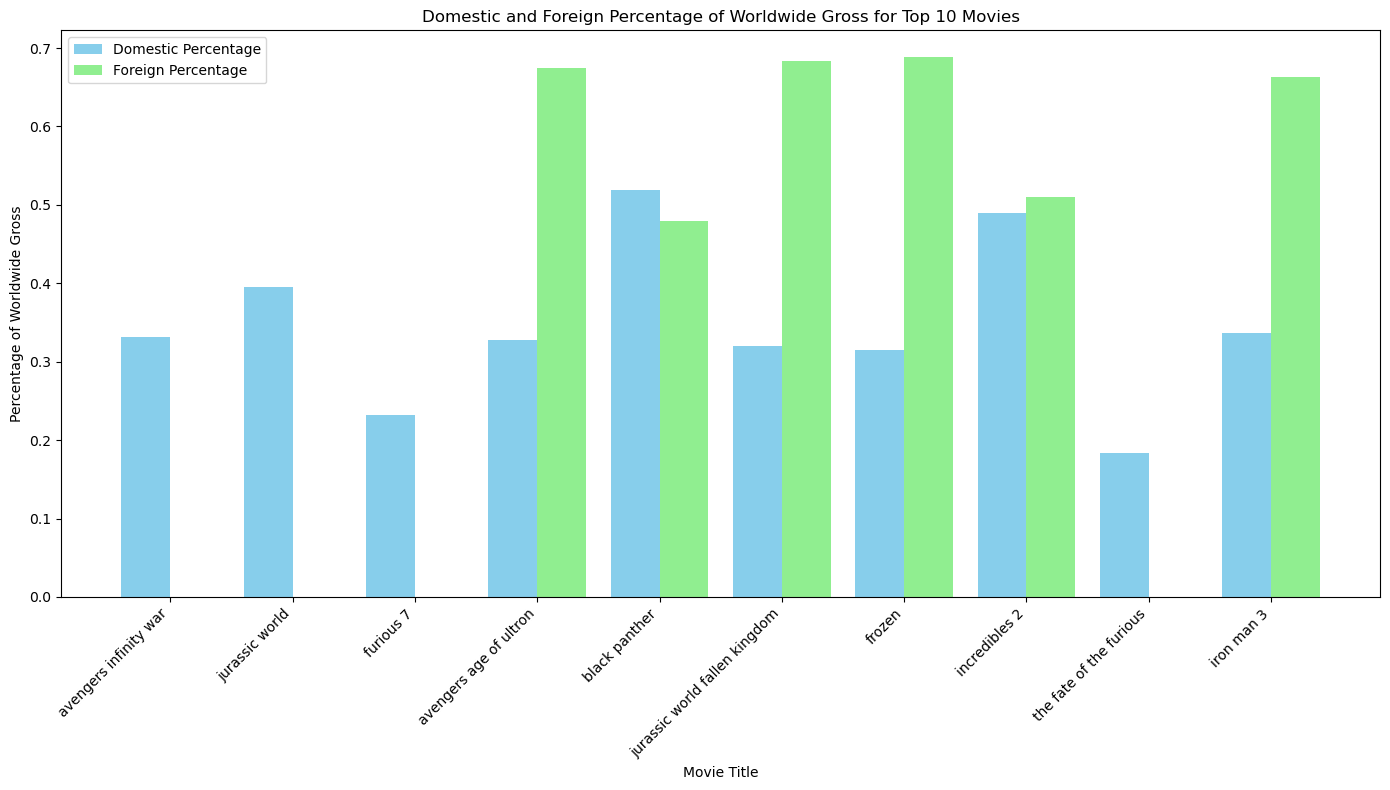

In [104]:
# Extract the top 10 movies by worldwide gross for visualization
top_10_worldwide = df_merged_bomtn.nlargest(10, 'worldwide_gross')
top_10_data = top_10_worldwide[['title', 'domestic_percentage', 'foreign_percentage']]

# Set up the bar chart
plt.figure(figsize=(14, 8))
bar_width = 0.4
bar_positions = range(len(top_10_data))

# Plot domestic and foreign percentages
bars1 = plt.bar(bar_positions, top_10_data['domestic_percentage'], width=bar_width, label='Domestic Percentage', color='skyblue')
bars2 = plt.bar([p + bar_width for p in bar_positions], top_10_data['foreign_percentage'], width=bar_width, label='Foreign Percentage', color='lightgreen')

# Add labels and title
plt.xlabel('Movie Title')
plt.ylabel('Percentage of Worldwide Gross')
plt.title('Domestic and Foreign Percentage of Worldwide Gross for Top 10 Movies')
plt.xticks([p + bar_width / 2 for p in bar_positions], top_10_data['title'], rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

##### Comment

###### Domestic Percentage: it represents the proportion of the total worldwide gross that was earned domestically (within the movie’s home country).
###### Foreign Percentage: it represents the proportion of the total worldwide gross that was earned in foreign markets (outside the movie’s home country)

### Dataset 'IMDB'

### Merging the two tables 'Movie basics' and 'movieratings' of the dataset IMDB

In [109]:
# Write the SQL query to join the tables
merge_query = """
SELECT
    b.movie_id,
    b.primary_title,
    b.original_title,
    b.start_year,
    b.runtime_minutes,
    b.genres,
    r.averagerating,
    r.numvotes
FROM
    movie_basics AS b
INNER JOIN
    movie_ratings AS r
ON
    b.movie_id = r.movie_id
;
"""

# Execute the query and read the result into a DataFrame
df_merged = pd.read_sql(merge_query, conn)
df_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


### Removing Unnecessary Columns & Filtering Data

In [111]:
# Drop the specified columns
df_merged_cleaned = df_merged.drop(columns=['primary_title', 'original_title'])

# Display the first few rows of the cleaned DataFrame
df_merged_cleaned.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,2018,122.0,Drama,6.9,4517
3,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Determing Average rating by Genre

In [113]:
# Split the genres into separate rows for analysis
df_genre_split = df_merged_cleaned.assign(genres=df_merged_cleaned['genres'].str.split(',')).explode('genres')

# Group by genre and calculate the average rating
avg_rating_by_genre = df_genre_split.groupby('genres')['averagerating'].mean().reset_index()

# Sort by average rating in descending order
avg_rating_by_genre = avg_rating_by_genre.sort_values(by='averagerating', ascending=False)

print(avg_rating_by_genre)

         genres  averagerating
21        Short       8.800000
7   Documentary       7.332090
11    Game-Show       7.300000
17         News       7.271330
4     Biography       7.162274
14        Music       7.091972
12      History       7.040956
22        Sport       6.961493
24          War       6.584291
18   Reality-TV       6.500000
15      Musical       6.498336
8         Drama       6.401559
9        Family       6.394725
3     Animation       6.248308
2     Adventure       6.196201
19      Romance       6.146608
6         Crime       6.115441
5        Comedy       6.002689
16      Mystery       5.920401
10      Fantasy       5.919473
25      Western       5.868214
0        Action       5.810361
23     Thriller       5.639114
20       Sci-Fi       5.489755
13       Horror       5.003440
1         Adult       3.766667


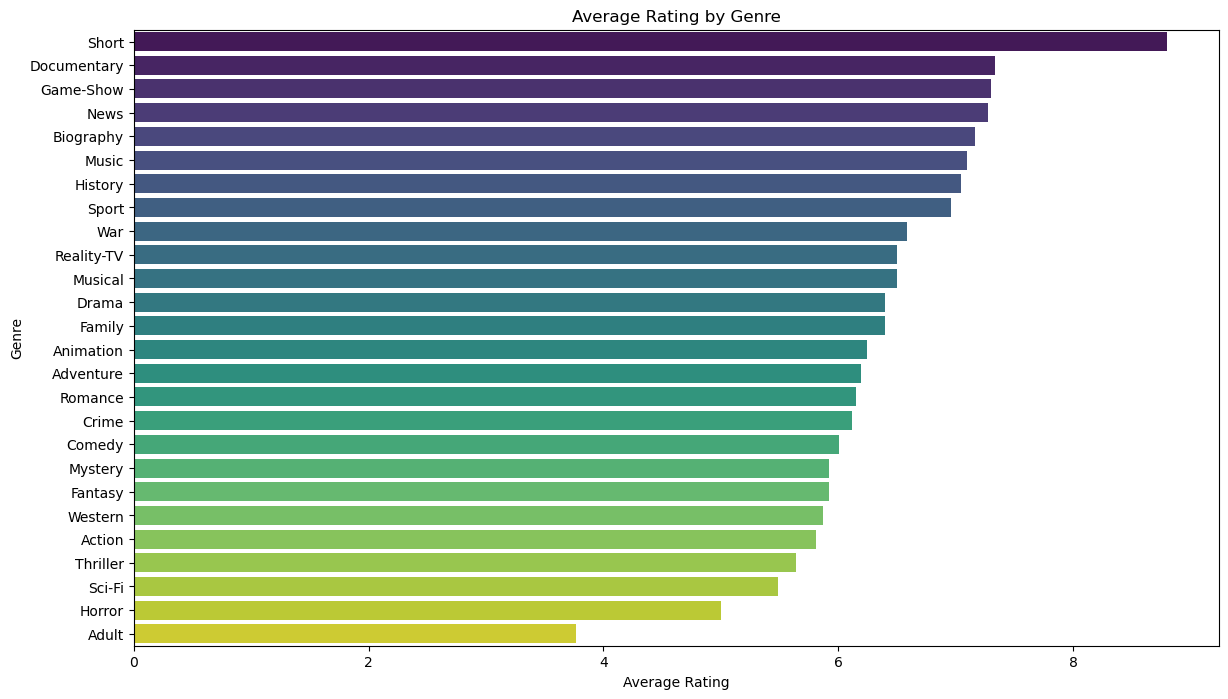

In [114]:
# Plotting the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='averagerating', y='genres', data=avg_rating_by_genre, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Rating by Genre')
plt.show()

#### Comment

###### From the above observations, Short Movies have been rated so highly  at 8.8, indicating that short films are highly appreciatedby viewers.

###### Documentaries: With an average rating of 7.33, documentaries are also well-received, suggesting that viewers value factual and informative content.
    
###### Game-Show, News, and Biography: These genres also have relatively high average ratings, indicating a preference forreality-based and biographical content.

### Average Runtime by Genre

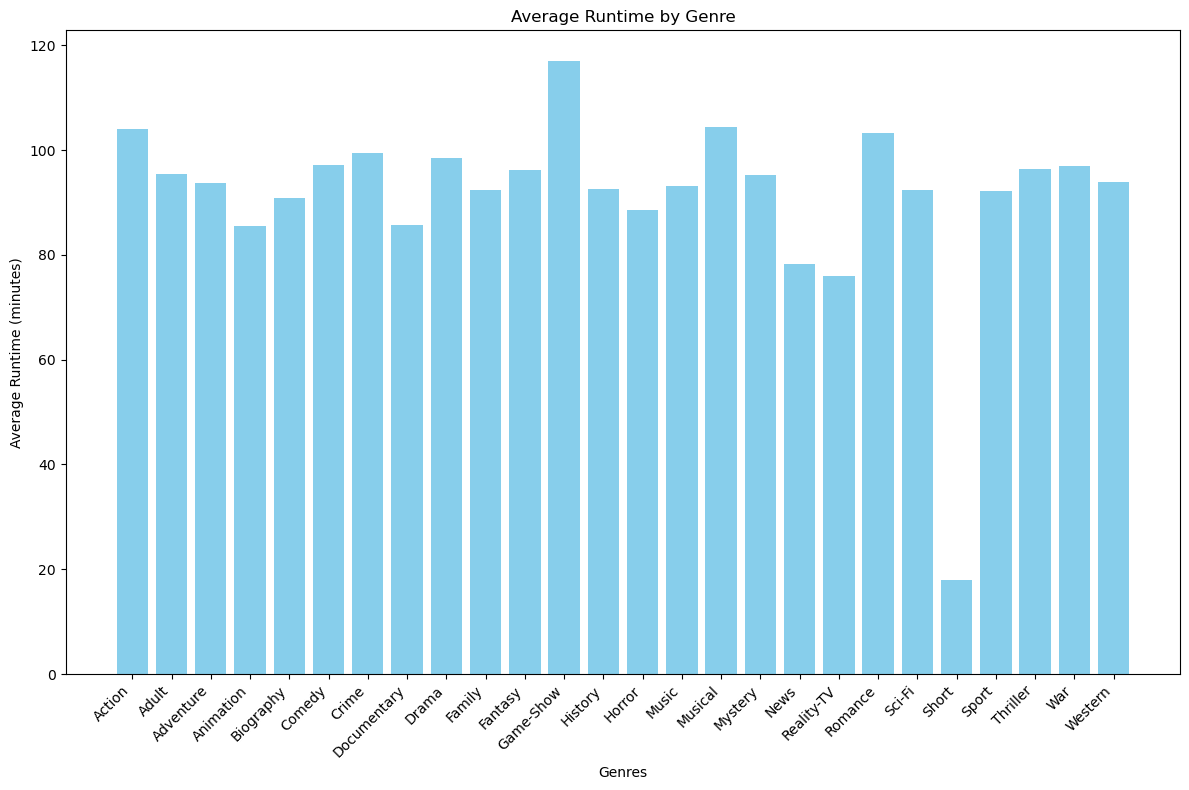

In [118]:
# Split the genres into separate rows for analysis
df_genre_split = df_merged_cleaned.assign(genres=df_merged_cleaned['genres'].str.split(',')).explode('genres')

# Group by genre and calculate the average runtime
avg_runtime_by_genre = df_genre_split.groupby('genres')['runtime_minutes'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12, 8))
plt.bar(avg_runtime_by_genre['genres'], avg_runtime_by_genre['runtime_minutes'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Runtime (minutes)')
plt.title('Average Runtime by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Comment

##### From the observation
######  Longer Runtimes: Genres with higher average runtimes might include 'Game-Show', 'Action' and 'romance'.They  might have longer runtimes due to the in-depth character development and intricate plots.

###### Shorter Runtimes: Genres with shorter average runtimes might be more fast-paced or less complex. For instance, "Short films", 'Reality Tv' and 'News'.

#####  These  films might have shorter runtimes as they often rely on quicker pacing and immediate engagement.

### Distribution of Ratings

In [122]:
# Descriptive statistics
mean_rating = df_merged_cleaned['averagerating'].mean()
print(mean_rating)
median_rating = df_merged_cleaned['averagerating'].median()
print(median_rating)
mode_rating = df_merged_cleaned['averagerating'].mode()[0]
print(mode_rating)

6.332728552859619
6.5
7.0


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


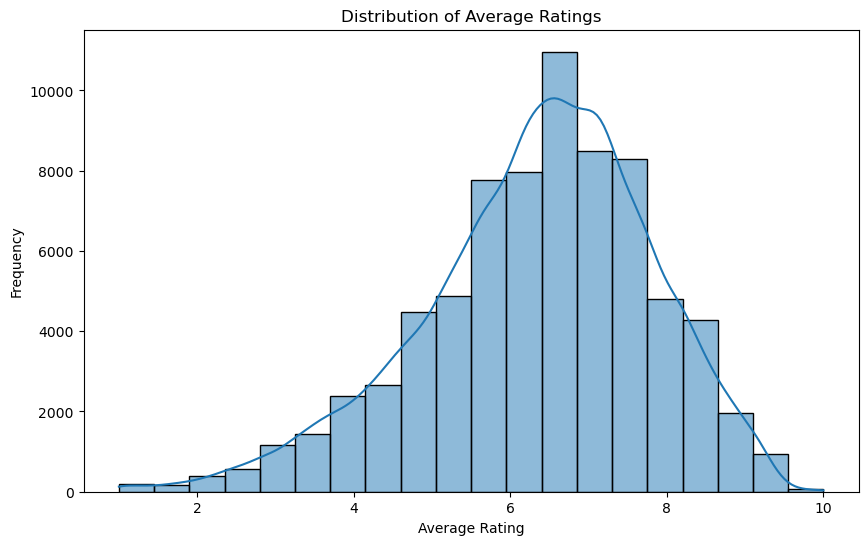

In [123]:
# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_merged_cleaned['averagerating'], bins=20, kde=True)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.show()

##### Interpretation

###### Mean Rating:The average rating is 6.3 this suggests that, on average, movies are rated fairly well.
###### Median Rating:  The median rating is 6.5. This means that half of the movies have a rating below 6.5, and half have a rating above 6.5. It indicates a fairly symmetrical distribution of ratings.
###### Mode Rating: If the mode is 7.0, it suggests that the most common rating given by viewers is 7.0.

#### Runtime Vs Rating

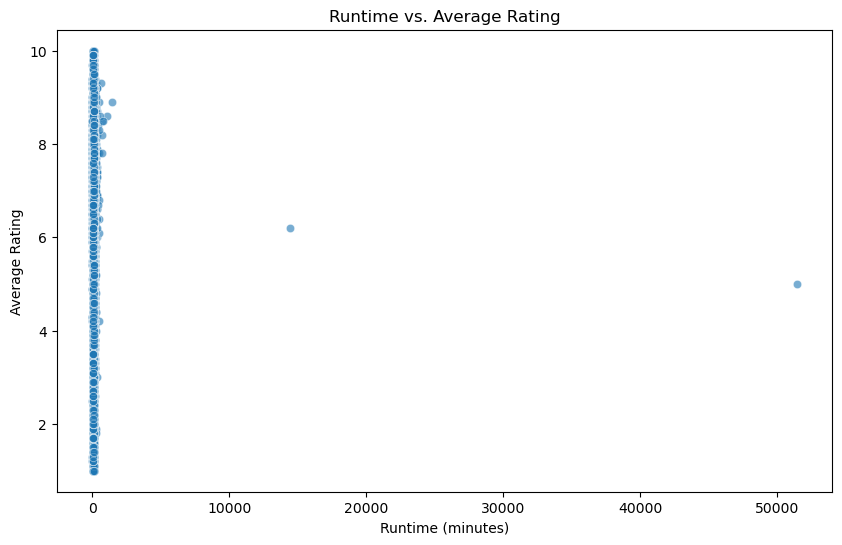

In [127]:
# Remove rows with missing values in 'runtime_minutes' or 'averagerating'
df_clean = df_merged_cleaned.dropna(subset=['runtime_minutes', 'averagerating'])

# Scatter plot of runtime vs. average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='runtime_minutes', y='averagerating', alpha=0.6)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.title('Runtime vs. Average Rating')
plt.show()

In [128]:
# Correlation
correlation = df_clean[['runtime_minutes', 'averagerating']].corr()
correlation

,runtime_minutes,averagerating
runtime_minutes,1.000000,-0.006963
averagerating,-0.006963,1.000000


#### Comment

###### The correlation coefficient between runtime_minutes and averagerating is -0.006963, which is very close to 0.This suggests that there is virtually no linear relationship between the runtime of a movie and its average rating.
###### Since the correlation is very close to zero, we can conclude that, based on this data, the length of a movie (runtime) does not have a significant impact on how it is rated on average.

### The MovieDB (TMDB) Join with The Numbers (TN)

##### Clean the Datasets

Standardize the title columns to ensure a successful join (e.g., convert to lowercase, strip whitespace

In [133]:
# Ensure 'id' columns are of the same type
df_tmdb['id'] = df_tmdb['id'].astype(str)
df_tn['id'] = df_tn['id'].astype(str)

# Merge datasets on the 'id' column
df_merged = pd.merge(df_tmdb, df_tn, on='id', how='inner')

# Display the first few rows of the merged dataset
df_merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,"Jun 6, 2014",edge of tomorrow,178000000.0,100206256.0,370541256.0
1,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,"Dec 31, 2020",moonfall,150000000.0,0.0,0.0
2,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,"Jul 19, 2002",stuart little 2,120000000.0,64956806.0,166000000.0
3,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,"Jul 23, 2004",catwoman,100000000.0,40202379.0,82145379.0
4,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,"Mar 21, 2014",divergent,85000000.0,150947895.0,276014965.0


#### Dropping unnecessary columns

In [135]:
columns_to_drop = ['Unnamed: 0', 'id', 'original_language', 'original_title', 
                   'popularity', 'vote_average', 'vote_count', 'release_date_y', 'movie']

df_cleaned = df_merged.drop(columns=columns_to_drop)
df_cleaned.head

<bound method NDFrame.head of              genre_ids release_date_x                  title  \
0    [28, 53, 878, 12]     1998-07-01             Armageddon   
1    [28, 53, 878, 12]     1998-07-01             Armageddon   
2    [28, 53, 878, 12]     1998-07-01             Armageddon   
3    [28, 53, 878, 12]     1998-07-01             Armageddon   
4    [28, 53, 878, 12]     1998-07-01             Armageddon   
..                 ...            ...                    ...   
339    [878, 9648, 12]     1968-04-10  2001: A Space Odyssey   
340    [878, 9648, 12]     1968-04-10  2001: A Space Odyssey   
341    [878, 9648, 12]     1968-04-10  2001: A Space Odyssey   
342    [878, 9648, 12]     1968-04-10  2001: A Space Odyssey   
343    [878, 9648, 12]     1968-04-10  2001: A Space Odyssey   

     production_budget  domestic_gross  worldwide_gross  
0          178000000.0     100206256.0      370541256.0  
1          150000000.0             0.0              0.0  
2          120000000.0     

#### Analyzing Relationship between Production Budget and Worldwide Gross Revenue

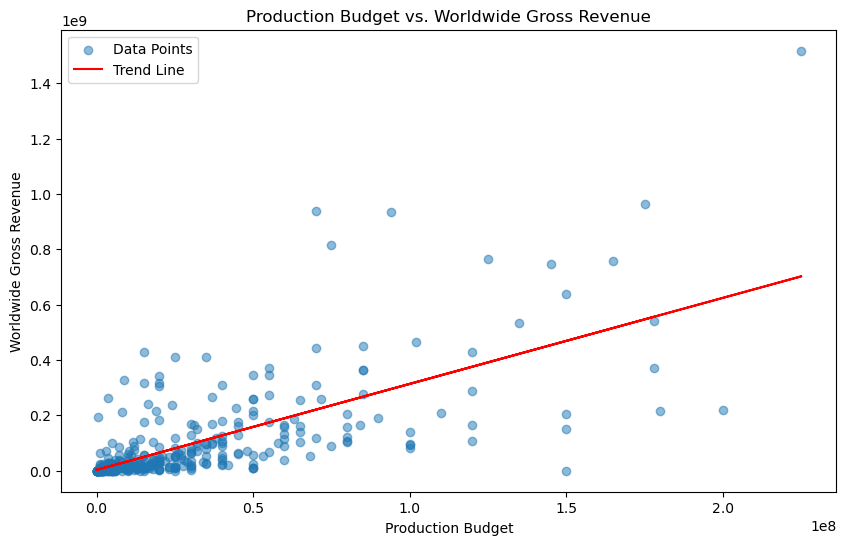

In [137]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df_cleaned['production_budget'].values.reshape(-1, 1)  # Feature
y = df_cleaned['worldwide_gross'].values  # Target

# Perform linear regression
reg = LinearRegression()
reg.fit(X, y)

# Predict values for the trend line
trend_line = reg.predict(X)

# Scatter plot of production budget vs. worldwide gross revenue
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['production_budget'], df_cleaned['worldwide_gross'], alpha=0.5, label='Data Points')
plt.plot(df_cleaned['production_budget'], trend_line, color='red', label='Trend Line')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross Revenue')
plt.title('Production Budget vs. Worldwide Gross Revenue')
plt.legend()
plt.show()

#### Comment

###### There is a Positive but Weak to Moderate Correlation between the Production budget and Worldwide-Gross:Meaning that higher production budgets tend to result in higher worldwide gross revenue.However, the spread of points suggests variability, indicating that the relationship is not perfect.

###### The scatter of points around the trend line shows that there are many exceptions. Some low-budget movies may have high grosses, and some high-budget movies may underperform.

### Revenue Analysis by Genre

In [141]:
backwards_key = {
'Action' : '28',
'Adventure' : '12',
'Animation' : '16',
'Comedy' : '35',
'Crime' : '80',
'Documentary' : '99',
'Drama' : '18',
'Family' : '10751',
'Fantasy' : '14',
'History' : '36',
'Horror' : '27',
'Music' : '10402',
'Mystery' : '9648',
'Romance' : '10749',
'Science Fiction' : '878',
'TV Movie' : '10770',
'Thriller' : '53',
'War' : '10752',
'Western' : '37'
}

genre_key = {v: k for k, v in backwards_key.items()}

In [142]:
# Group by genre and calculate the total worldwide gross revenue
genre_revenue = df_cleaned.explode('genre_ids').groupby('genre_ids')['worldwide_gross'].sum().reset_index()
genre_revenue

,genre_ids,worldwide_gross
0,"[18, 10402, 10749]",8.059946e+09
1,"[28, 35, 80]",5.289434e+09
2,"[28, 53, 878, 12]",4.174933e+09
3,"[80, 18, 9648, 53]",5.230904e+09
4,"[878, 28, 12]",5.520900e+09
5,"[878, 9648, 12]",5.440972e+09


#### A vision plot

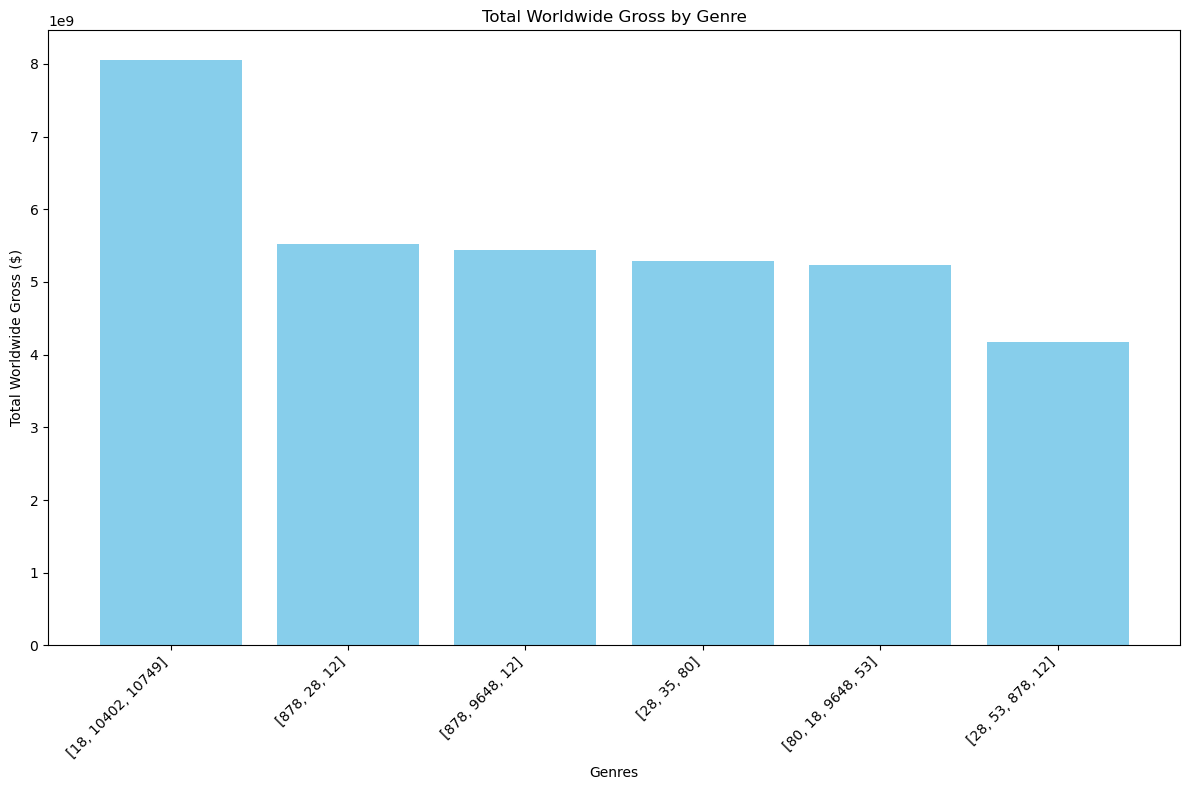

In [144]:
df_cleaned['worldwide_gross'] = df_cleaned['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
genre_revenue = df_cleaned.explode('genre_ids').groupby('genre_ids')['worldwide_gross'].sum().reset_index()

# Sort the DataFrame by 'worldwide_gross' for better visualization
genre_revenue = genre_revenue.sort_values(by='worldwide_gross', ascending=False)

# Plot the total worldwide gross for each genre
plt.figure(figsize=(12, 8))
plt.bar(genre_revenue['genre_ids'], genre_revenue['worldwide_gross'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Total Worldwide Gross ($)')
plt.title('Total Worldwide Gross by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### Comment

###### Highest Revenue: 
The genre combination [18, 10402, 10749] has the highest revenue with approximately $8.06 billion. These genre IDs could represent a mix of Drama (18), Music (10402), and Romance (10749), indicating that movies blending drama, music, and romance have performed exceptionally well.

###### Action-Comedy-Crime:
The combination [28, 35, 80] has generated about $5.29 billion. These genres  represent Action (28), Comedy (35), and Crime (80), showing a strong performance for action-comedy-crime films.

###### Action-Sci-Fi-Adventure: 
The combination [28, 53, 878, 12] has earned approximately $4.17 billion. This mix include Action (28), Thriller (53), Science Fiction (878), and Adventure (12), indicating a significant revenue for high-adrenaline, thrilling, and adventurous sci-fi films.

###### Crime-Drama-Mystery-Thriller:
The combination [80, 18, 9648, 53] has generated about $5.23 billion, suggesting a strong audience preference for movies that blend crime, drama, mystery (9648), and thriller genres.

###### Sci-Fi-Action-Adventure: 
The genre set [878, 28, 12] has earned approximately $5.52 billion, reaffirming the popularity of science fiction, action, and adventure movies.

###### Sci-Fi-Mystery-Adventure:
The combination [878, 9648, 12] has generated around $5.44 billion, showing a strong performance for movies that mix sci-fi, mystery, and adventure elements.
Summary:

### Interpret Findings

#### 1.Studio Performance by Worldwide Gross Revenue

##### Highest Grossing Studios: 
From the data, we observe that the studio BV (Buena Vista) has the highest worldwide gross revenue,followed by Universal (Uni), Fox, and Sony.

The data indicates that BV and Universal are leading in movie production in terms of worldwide gross revenue, showcasing their dominance in the industry.

#### 2.Movie Titles with Highest Worldwide Gross
##### Top Movies:
The movie titles with the highest worldwide gross are 'Avengers: Infinity War' from BV studio, 'Jurassic World' from Uni studio, 'Furious 7' from Uni studio, and 'Avengers: Age of Ultron' from BV studio.

These top-grossing movies suggest that BV and Uni studios are highly successful, with multiple blockbuster hits contributing to their high gross revenues.


#### 3.Return on Investment (ROI) Analysis
 Frozen' (BV) had a significant ROI of 7.48, indicating substantial profitability.
'Furious 7' (Uni) had a high ROI of 6.99, showing strong financial returns. 'Jurassic World: Fallen Kingdom' (Uni) had an ROI of 6.68, demonstrating good profitability.

 Profitability vs. Cost: Although 'Avengers: Infinity War' had massive earnings, its high production costs reduced its ROI compared to other top-grossing movies. This illustrates that high gross revenue does not always equate to high profitability.

##### 4.Genre and Runtime Insights
The high ratings for short films, documentaries, and reality-based content indicate viewer preferences for concise, informative, and realistic content.


#### 5.Ratings Distribution Analysis

 Mean Rating: The average rating of 6.3 suggests movies are rated fairly well overall.Median Rating: A median rating of 6.5 indicates a fairly symmetrical distribution of ratings.Mode Rating: The most common rating is 7.0.

The distribution of ratings shows that most movies are perceived positively, with a significant number of them receiving a rating of 7.0.

#### 6.Relationship between Production Budget and Worldwide Gross
 Positive Correlation: There is a weak to moderate positive correlation between production budget and worldwide gross.

##### Budget vs. Revenue:
Higher production budgets generally result in higher worldwide gross revenue, but the variability indicates that many exceptions exist. Some low-budget movies can achieve high grosses, and some high-budget movies may underperform. This highlights the complexity of predicting movie success based on budget alone.


#### 7.Correlation between Runtime and Average Rating
 This near-zero correlation suggests that the length of a movie does not significantly impact its average rating. Viewers do not necessarily prefer longer or shorter movies based on this data.

### RECOMMENDATIONS:

######  Focus on High-Grossing Genres and Studios:
 Prioritize genres and movie types that have historically performed well in terms of worldwide gross revenue. According to our findings, studios like BV (Buena Vista) and Universal (Uni) have produced some of the highest-grossing movies, including 'Avengers: Infinity War,' 'Jurassic World,' and 'Furious 7.'

######  Balance Between Production Budget and ROI:
 While aiming for high worldwide gross revenue, it is also essential to manage production budgets effectively to ensure a strong return on investment (ROI).
Set realistic budgets for productions while maintaining high-quality standards.

Movies like 'Frozen' and 'Furious 7' demonstrated significant profitability with ROIs of 7.48 and 6.99, respectively. Carefully evaluate potential projects to balance production costs and expected revenue

######  Leverage Viewer Preferences in Genres and Runtimes:

Cater to viewer preferences for both high-rated genres and suitable runtimes. Genres such as short films, documentaries, and biographical content have high average ratings.

Diversify our film portfolio to include a mix of genre types. While blockbuster action and adventure films can drive high revenue, incorporating highly-rated genres like documentaries and short films can enhance our brand reputation and attract diverse audiences.

######  Target Both Domestic and International Markets:

Plan for a balanced approach to earning revenue from both domestic and foreign markets. Our analysis shows that successful movies have substantial earnings from international audiences.

Develop marketing strategies tailored to different regions, leveraging cultural trends and preferences. Consider international partnerships for co-productions to enhance global appeal.